<a href="https://colab.research.google.com/github/ptuan5/jovian-classical-ml/blob/main/machine_learning_tuan_nguyen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Key Indicators of Heart Diseases

# **Background**

Cardiovascular diseases are the leading cause of mortality. More than 80% of the deaths are due to heart attacks and stroke [[1]](https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1), which are sudden and acute. Treatments of such diseases can also be costly, and early diagnosis and treatment of risk factors can greatly improve the healthcare quality.

<center>
<img alt="heart-screenings-are-necessary" src="https://share-cdn-prod.azureedge.net/wp-content/uploads/2021/05/3393_HBEAT520824_heart_screening_tw.png" width="500"/>
</center>







# **The Dataset**

The Behavioral Risk Factor Surveillance System (BRFSS) of the United States conducts annual telephone surveys to collect its citizens' health-related information [[2]](https://www.cdc.gov/brfss/annual_data/annual_2020.html). This dataset originates from the 2020 survey and is cleaned by Kamyl Pytlak on Kaggle to keep relevant attributes and entries [[3]](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease).

Install and import required libraries


In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset_url = "https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease"

In [ ]:
od.download(dataset_url)

100%|██████████| 3.13M/3.13M [00:00<00:00, 177MB/s]

In [ ]:
data_dir = 'personal-key-indicators-of-heart-disease'

In [ ]:
!ls -l {data_dir}

total 24600
-rw-r--r-- 1 root root 25189554 Apr 28 02:10 heart_2020_cleaned.csv


There is only 1 dataset which is not too large (about 25Mb), so we can load the entire df into a dataframe.

In [ ]:
all_df = pd.read_csv(data_dir + '/heart_2020_cleaned.csv')

In [ ]:
all_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

There are about 320k entries and 18 columns. The dataset contains numeric, and categorical columns (most of which are binary). There is no missing value (as this dataset is already cleaned).

## Exploratory Data Analysis


In [ ]:
all_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


There are 4 numerical values, with a reasonable median. The minimum and maximum values for each of them are technically possible, but BMI of 12 or under can be life-threating, and nobody should sleep on average 24 hours/day. So, it may worth looking at the distribution of these variables to check whether it can be a misentry.

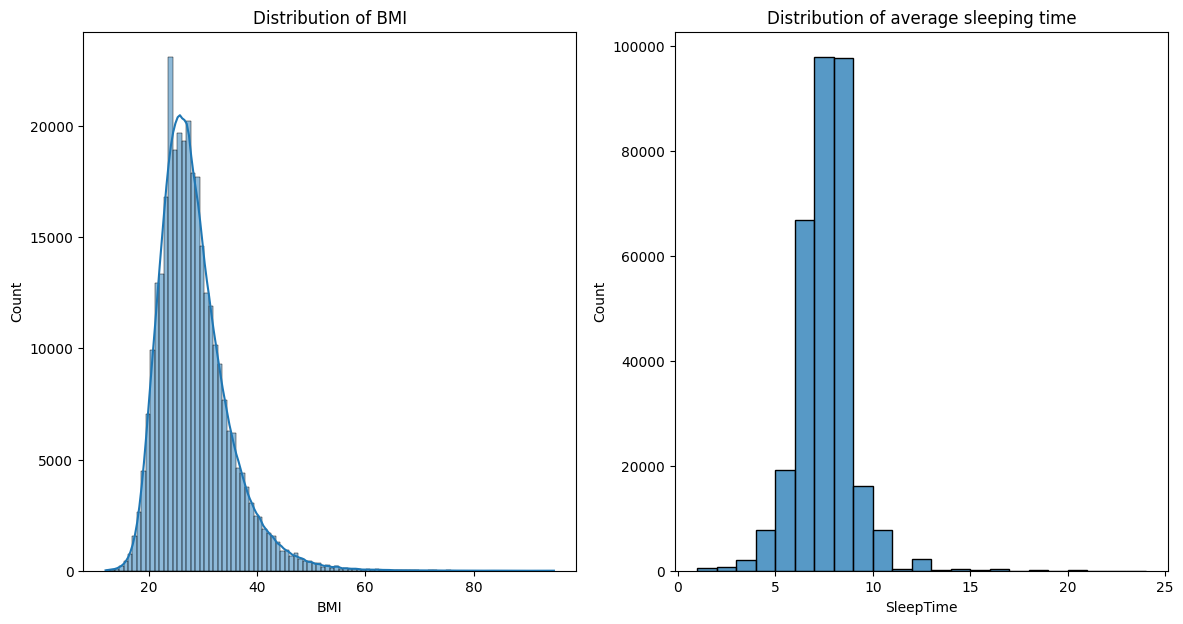

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (14, 7))

sns.histplot(data = all_df, x = "BMI", bins = 100, kde = True, ax = axes[0]);
axes[0].set_title('Distribution of BMI');
sns.histplot(data = all_df, x = "SleepTime", binwidth = 1, ax = axes[1]);
axes[1].set_title('Distribution of average sleeping time');


In [ ]:
sum(all_df.SleepTime >= 20)

108

The distribution of BMI is quite smooth without any odd peaks, so I don't think there's a good enough reason to exclude any entries based on BMI. However, I will exclude entries where daily sleep time is 20 hours or more, because these few entries are very strange.

In [ ]:
all_df = all_df[all_df.SleepTime < 20]

In [ ]:
all_df.describe(include = 'object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319687,319687,319687,319687,319687,319687,319687,319687,319687,319687,319687,319687,319687,319687
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292339,187829,297919,307637,275327,167748,34140,245167,269584,247909,113845,276834,307921,289881


The vast majority of categorical attributes are binary. Some values are ordinal (Age Category and General Health).

One problem is that the dataset is heavily biased in many attributes, including the explanatory variable (HeartDisease). While it is a great fact that the general population have positive health conditions, it may make the machine learning prediction less accurate.

<Axes: xlabel='HeartDisease', ylabel='BMI'>

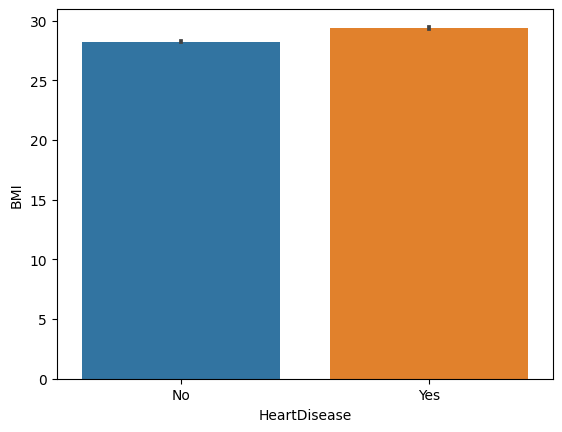

In [ ]:
sns.barplot(data = all_df, x = 'HeartDisease', y = 'BMI')

## Prepare Data for Modeling

Split into 3 subsets with 3:1:1 ratio.


In [ ]:
from sklearn.model_selection import train_test_split, KFold

In [ ]:
train_val_df, test_df = train_test_split(all_df, test_size=0.2, random_state=15)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=15)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (191811, 18)
val_df.shape : (63938, 18)
test_df.shape : (63938, 18)


Choose input and output columns

In [ ]:
# Using all columns as inputs
input_cols = list(all_df.columns)[1:]
target_col = 'HeartDisease'

In [ ]:
# create the input and target dataframe for each set
train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_col].copy()
test_inputs, test_targets = test_df[input_cols].copy(), test_df[target_col].copy()

# **Hardcore Model & Evaluation Criteria**

This model will always predict that there is no heart disease.

In [ ]:
# Hardcore model
def all_no(inputs):
  return np.full(len(inputs), 'No')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy_score(test_targets, all_no(test_inputs))

0.9127905158121931

The model already achieves an accuracy score of 91%, which is expected because the majority of the survey population do not have heart diseases.

However, *accuracy* alone is not always the best indicator for a medical test. In the case of heart diseases, a false negative is much more dangerous than a false positive, so *sensitivy* (or *recall*) can be more important than *specificity* or *accuracy* for this model. 

As we care more about the minority class in this case, [[4]](https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/) I will chose either the **F2 score** or **PR AUC** as the evaluation metric.

In [ ]:
def evaluate_model(real_val, predict_val, return_score = False):
  tn = confusion_matrix(real_val, predict_val)[0, 0]
  fp = confusion_matrix(real_val, predict_val)[0, 1]
  fn = confusion_matrix(real_val, predict_val)[1, 0]
  tp = confusion_matrix(real_val, predict_val)[1, 1]

  sensitivity = tp/(tp + fn)
  specificity = tn/(tn + fp)
  accuracy = (tp + tn)/(tp + tn + fn + fp)

  if return_score:
    return sensitivity, specificity, accuracy
  else:
    print('Sensitivity:', sensitivity)
    print('Specificity:', specificity)
    print('Accuracy:', accuracy)

In [ ]:
evaluate_model(test_targets, all_no(test_inputs))

Sensitivity: 0.0
Specificity: 1.0
Accuracy: 0.9127905158121931


The model's sensitivity is 0 as expected since it never predicts Yes. In addition, I will create a second baseline model, which will randomly assign a case into Yes/No.

In [ ]:
# Hardcore model 2
def random_guess(inputs):
  return np.random.choice(['No', 'Yes'], len(inputs))

In [ ]:
evaluate_model(test_targets, random_guess(test_inputs))

Sensitivity: 0.49766857962697275
Specificity: 0.5007710496555978
Accuracy: 0.5005004848446933


The model improves in sensitivity to about 50%, which is quite bad. Additionally, it trades off tremendous accuracy.

# **Preprocess Data**

## Scale numeric data

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
# Identify numeric and categorical columns
numeric_cols = list(all_df[input_cols].select_dtypes('float64').columns)
object_cols = list(all_df[input_cols].select_dtypes('object').columns)


In [ ]:
scaler = RobustScaler().fit(all_df[numeric_cols])
scaled_cols = [col + '_scaled' for col in numeric_cols]

In [ ]:
train_inputs[scaled_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[scaled_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[scaled_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[scaled_cols].describe()

,BMI_scaled,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled
count,191811.000000,191811.000000,191811.000000,191811.000000
mean,0.136603,1.681992,1.298836,0.045795
std,0.860823,3.970087,2.649119,0.705687
min,-2.070365,0.000000,0.000000,-3.000000
25%,-0.445196,0.000000,0.000000,-0.500000
50%,0.002706,0.000000,0.000000,0.000000
75%,0.560217,1.000000,1.000000,0.500000
max,9.112314,15.000000,10.000000,6.000000



## Encode categorical data


In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
# The ordinal and categorical columns
ordinal_cols = ['AgeCategory','GenHealth']
categorical_cols = [x for x in object_cols if x not in ordinal_cols] #non-ordinal

In [ ]:
ordinal_encoder = OrdinalEncoder(categories = [['18-24', '25-29', '30-34', '35-39', '40-44', '45-49','50-54',
                                                '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
                                               ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']]).fit(all_df[ordinal_cols])
                                              
category_encoder = OneHotEncoder(sparse_output=False,drop='if_binary').fit(all_df[categorical_cols])

In [ ]:
def encode(df_inputs, get_encoded_cols = False, categorical_cols = categorical_cols, ordinal_cols = ordinal_cols,
           ordinal_encoder = ordinal_encoder, category_encoder = category_encoder):
  category_encoded_cols = list(category_encoder.get_feature_names_out(categorical_cols))
  ordinal_encoded_cols = [col + '_code' for col in ordinal_cols]
  encoded_cols = category_encoded_cols + ordinal_encoded_cols

  if get_encoded_cols:
    return encoded_cols
  else:
    df_inputs[category_encoded_cols] = category_encoder.transform(df_inputs[categorical_cols])
    df_inputs[ordinal_encoded_cols] = ordinal_encoder.transform(df_inputs[ordinal_cols])
    
    return df_inputs

In [ ]:
encoded_cols = encode(test_inputs, get_encoded_cols = True)

In [ ]:
train_inputs = encode(train_inputs)
val_inputs = encode(val_inputs)
test_inputs = encode(test_inputs)

In [ ]:
# Extract columns for training
X_train = train_inputs[scaled_cols + encoded_cols]
X_val = val_inputs[scaled_cols + encoded_cols]
X_test = test_inputs[scaled_cols + encoded_cols]

# **Train Different Models**

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logReg_model = LogisticRegression(solver = 'liblinear')

In [ ]:
logReg_model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [ ]:
train_preds_logReg = logReg_model.predict(X_train)
evaluate_model(train_targets, train_preds_logReg)

Sensitivity: 0.1121404193076548
Specificity: 0.9910947931335268
Accuracy: 0.915906804093613


In [ ]:
val_preds_logReg = logReg_model.predict(val_inputs[scaled_cols + encoded_cols])
evaluate_model(val_targets, val_preds_logReg)

Sensitivity: 0.1127889634601044
Specificity: 0.991310137603715
Accuracy: 0.917607682442366


The logistic regression models *barely improves* the performance compared to the hardcore model.

## Decision Tree & Random Forest

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(random_state=15)

In [ ]:
tree_model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=15)

In [ ]:
train_preds_tree = tree_model.predict(X_train)
evaluate_model(train_targets, train_preds_tree)

Sensitivity: 0.9709288152120916
Specificity: 0.9999315861188235
Accuracy: 0.9974506154495831


In [ ]:
val_preds_tree = tree_model.predict(val_inputs[scaled_cols + encoded_cols])
evaluate_model(val_targets, val_preds_tree)

Sensitivity: 0.25782997762863535
Specificity: 0.9218766005394885
Accuracy: 0.8661672244987332


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randForest_model = RandomForestClassifier(random_state=15)

In [ ]:
randForest_model.fit(X_train, train_targets)

RandomForestClassifier(random_state=15)

In [ ]:
train_preds_randf = randForest_model.predict(X_train)
evaluate_model(train_targets, train_preds_randf)

Sensitivity: 0.9734275962944905
Specificity: 0.9996579305941176
Accuracy: 0.9974141211922153


In [ ]:
val_preds_randf = randForest_model.predict(X_val)
evaluate_model(val_targets, val_preds_randf)

Sensitivity: 0.1127889634601044
Specificity: 0.9808276709802984
Accuracy: 0.9080046294848134


Decision tree model has better sensitivy than logistic regression model, but it has overfitted the training data. The overfitting problem remains when I try random forest, yet the sensitivity reduces again.

## Gradient Boosting Machines (GBM)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
gbm_model = XGBClassifier(objective = 'binary:logistic', eval_metric = 'error', random_state = 15)

In [ ]:
target_codes = {'No': 0, 'Yes': 1}
inv_codes = {0: 'No', 1: 'Yes'}

In [ ]:
gbm_model.fit(X_train, train_targets.map(target_codes))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=15, ...)

In [ ]:
train_preds_gbm = gbm_model.predict(X_train)
evaluate_model(train_targets, pd.Series(train_preds_gbm).map(inv_codes))

Sensitivity: 0.14450268161872257
Specificity: 0.9951369132797044
Accuracy: 0.9223715011130749


In [ ]:
val_preds_gbm = gbm_model.predict(X_val)
evaluate_model(val_targets, pd.Series(val_preds_gbm).map(inv_codes))

Sensitivity: 0.10253542132736763
Specificity: 0.9918905999248814
Accuracy: 0.9172792392630361


# **Tune Hyperparameters** 

I will tune the **decision tree model** because so far it improves the sensitivity the most while maintaining a reasonable accuracy. Furthermore, this model is more interpretable than random forest or gradient boosting.

In [ ]:
from sklearn.tree import plot_tree

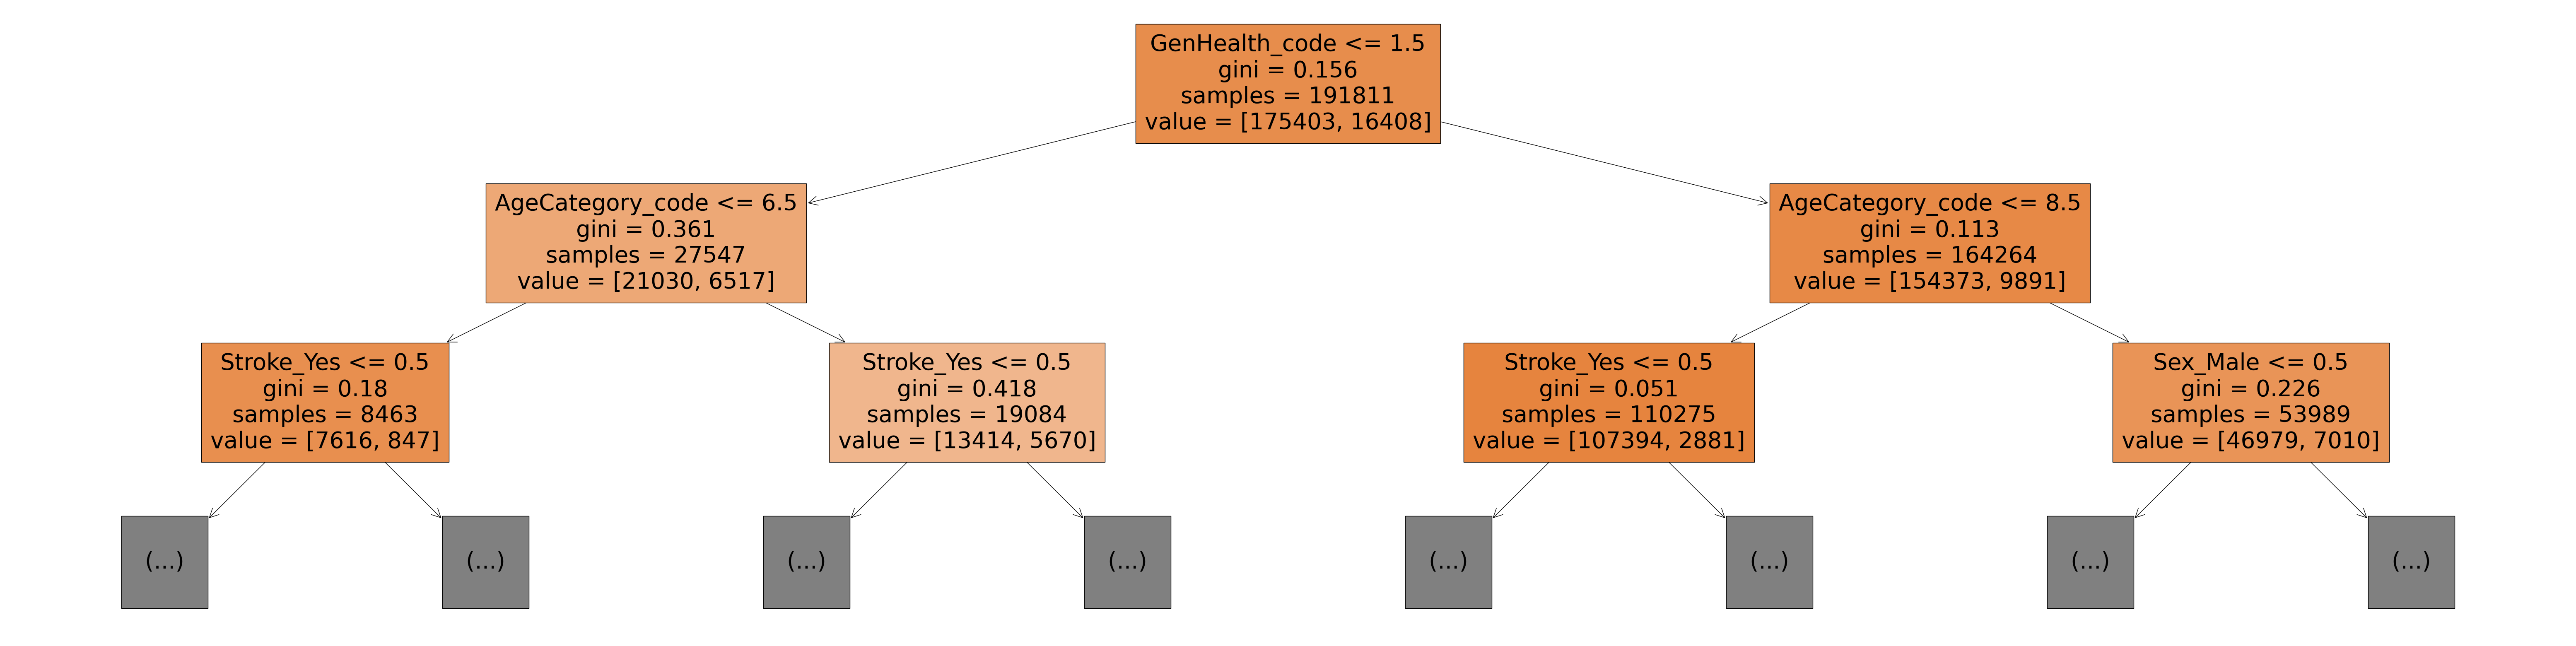

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(tree_model, feature_names=X_train.columns, max_depth=2, filled=True);

In [ ]:
best_params = {
    'random_state': 15,
}

In [ ]:
def test_params(param_name, param_values, **other_params):
  train_sensitivity, train_accuracy, val_sensitivity, val_accuracy = [], [], [], []
  for value in param_values:
    params = dict(other_params)
    params[param_name] = value

    model = DecisionTreeClassifier(**params).fit(X_train, train_targets)

    train_sen, train_spec, train_acc = evaluate_model(train_targets, model.predict(X_train), return_score=True)
    val_sen, val_spec, val_acc = evaluate_model(val_targets, model.predict(X_val), return_score=True)

    train_sensitivity.append(train_sen)
    train_accuracy.append(train_acc)
    val_sensitivity.append(val_sen)
    val_accuracy.append(val_acc)
  
  plt.figure(figsize = (12,8))
  plt.plot(param_values, train_sensitivity, 'b-o')
  plt.plot(param_values, train_accuracy, 'b--o')
  plt.plot(param_values, val_sensitivity, 'r-o')
  plt.plot(param_values, val_accuracy, 'r--o')
  plt.xlabel(param_name)
  plt.ylabel('Score')
  plt.title('Overfitting curve: ' + param_name)
  plt.legend(['Training sensitivity', 'Training accuracy', 'Validation sensitivity', 'Validation accuracy'])

## Criterion

There are 3 possible options (*'gini', 'entropy', 'log_loss'*). The default value is *'gini'*

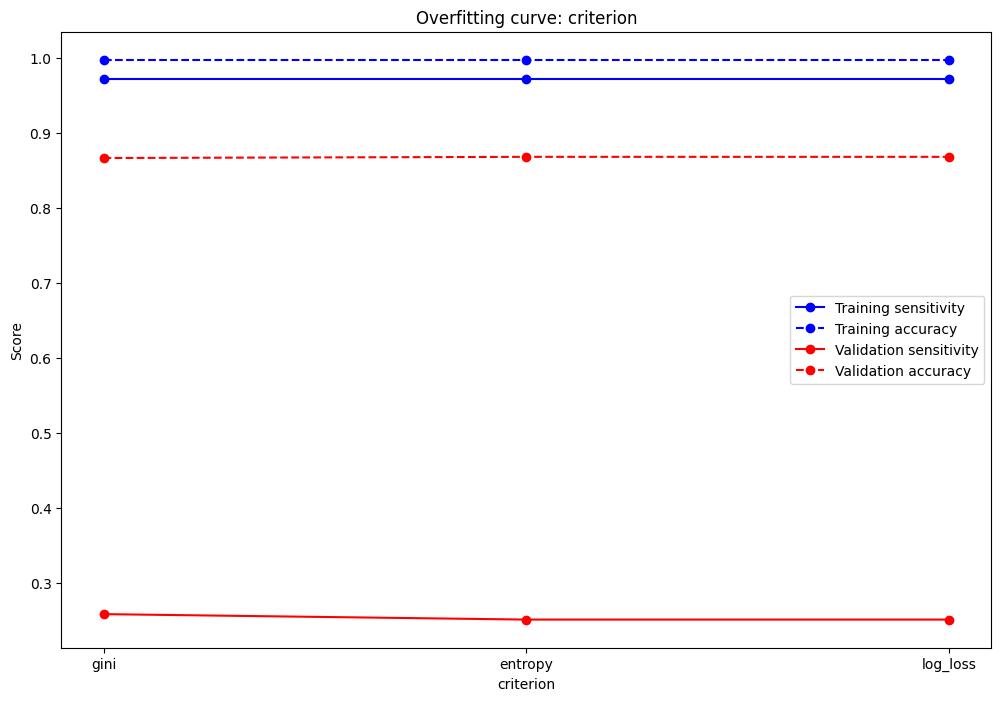

In [ ]:
test_params('criterion', ['gini', 'entropy', 'log_loss'], **best_params)

## Max Depth

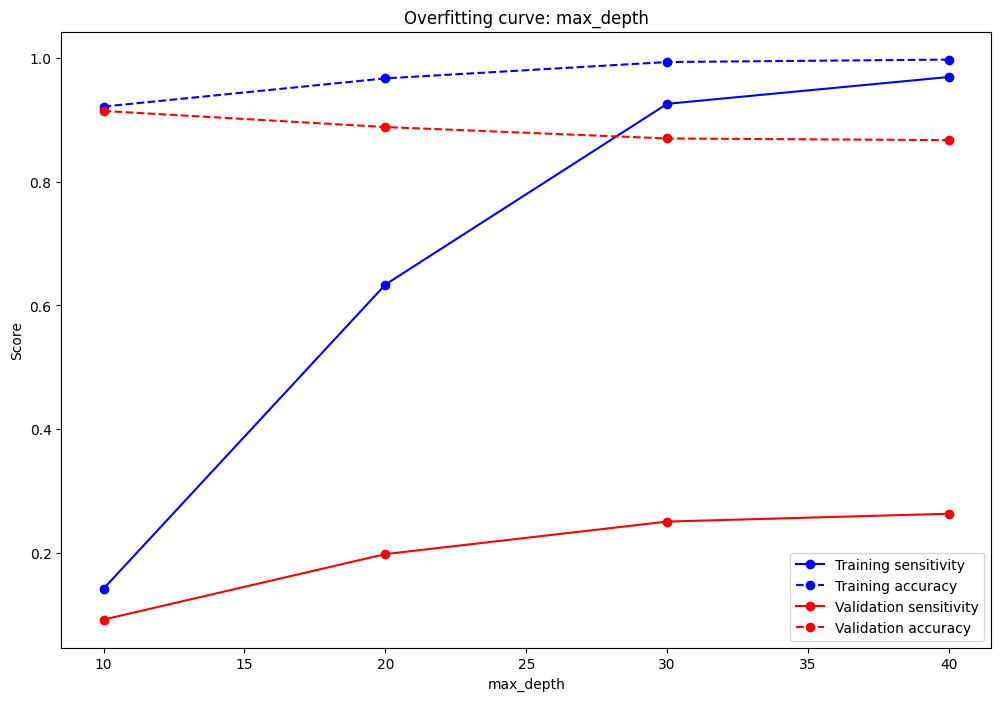

In [ ]:
test_params('max_depth', [10, 20, 30, 40], **best_params)

## Max Leaf Nodes

## Minimum samples split

# **Reference**


1. Cardiovascular diseases overview: https://www.who.int/health-topics/cardiovascular-diseases
2. CDC original data: https://www.cdc.gov/brfss/annual_data/annual_2020.html
3. The cleaned dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
4. Framework for imbalanced classification project: https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/